In [43]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
lim = 10
x = np.linspace(-lim, lim, 1000)  # 100 points from -π to π
y = np.linspace(-lim, lim, 1000)

b0_pos = np.array([0, -5])
b1_pos = np.array([0, 5])
a_pos  = np.array([6, 0])
meas_noise = 1
# calculate range meas to each beacon
b0_meas = np.linalg.norm(b0_pos - a_pos)
b1_meas = np.linalg.norm(b1_pos - a_pos)

z_vec = np.array([b0_meas, b1_meas]) 

# calculate the measerment liklihood for each pear of x, y
def meas_likelihood(x, y, z, b0_pos, b1_pos):
    a_pos = np.array([x, y])
    b0_meas = np.linalg.norm(b0_pos - a_pos)
    b1_meas = np.linalg.norm(b1_pos - a_pos)
    z_vec = np.array([b0_meas, b1_meas])
    return np.exp(-np.linalg.norm(z_vec - z)**2/(2*meas_noise**2))

# calc for all the grid
X, Y = np.meshgrid(x, y)
Z = np.zeros(X.shape)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        Z[i, j] = meas_likelihood(X[i, j], Y[i, j], z_vec, b0_pos, b1_pos)



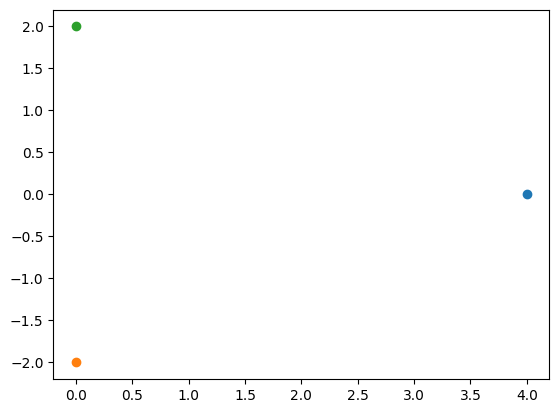

In [40]:
#print the  agents and the beacons
plt.figure()
plt.scatter(a_pos[0], a_pos[1], label='agent')
plt.scatter(b0_pos[0], b0_pos[1], label='beacon 0')
plt.scatter(b1_pos[0], b1_pos[1], label='beacon 1')

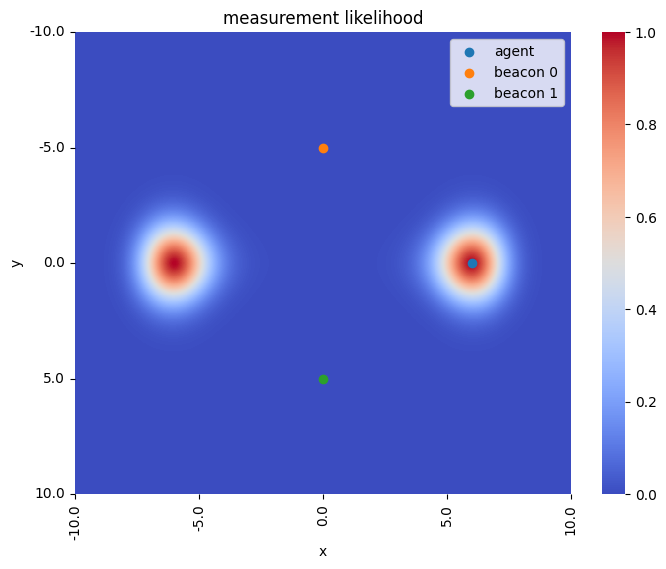

In [ ]:
#scale Z values to 0-1
Z = (Z - Z.min()) / (Z.max() - Z.min())
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(Z, cmap='coolwarm', cbar=True)
plt.title("measurement likelihood")
plt.xlabel("x")
plt.ylabel("y")
#change the x and y ticks to match the x and y values
plt.xticks(np.linspace(0, 1000, 5), np.linspace(-lim, lim, 5))
plt.yticks(np.linspace(0, 1000, 5), np.linspace(-lim, lim, 5))


#load robot icon
import matplotlib.image as mpimg
robot_icon_path = r'PF\beacon-icon-23.jpg'
robot_icon = mpimg.imread('robot.png')

#add the agents and beacons
scaled_agent_pos = a_pos/(2*lim)*1000 + 500
acaled_b0_pos = b0_pos/(2*lim)*1000 + 500
scaled_b1_pos = b1_pos/(2*lim)*1000 + 500
# plt.scatter(a_pos[0]/(2*lim)*1000 + 500, a_pos[1]/(2*lim)*1000 + 500, label='agent')
# plt.scatter(b0_pos[0]/(2*lim)*1000 + 500, b0_pos[1]/(2*lim)*1000 + 500, label='beacon 0')
# plt.scatter(b1_pos[0]/(2*lim)*1000 + 500, b1_pos[1]/(2*lim)*1000 + 500, label='beacon 1')
plt.scatter(scaled_agent_pos[0],scaled_agent_pos[1], label='agent')
plt.scatter(acaled_b0_pos[0],acaled_b0_pos[1] , label='beacon 0')
plt.scatter(scaled_b1_pos[0],scaled_b1_pos[1], label='beacon 1')
# add legen
plt.legend()
plt.show()


In [33]:
a_pos[0]/(2*lim)*1000 - 500

-300.0